# Import the packages and modules

In [1]:
from gym_vrp.envs import SantaIRPEnv
from agents import IRPAgent

import torch


## Train the agent

In [2]:
# Original
# batch_size = 256
# seed = 69
# num_nodes = 20

# Quick Test
# batch_size = 10
# seed = 23
# num_nodes = 5

batch_size = 512
seed = 23
num_nodes = 40

num_epochs = 1751
# num_epochs = 251

In [3]:
# Instantiate the SantaIRPEnv environment
env_santa_irp = SantaIRPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed)

# Instantiate the IRPAgent (assuming it's compatible with SantaIRPEnv)
agent_santa_irp = IRPAgent(
    seed=seed, csv_path=f"./train_logs/loss_log_santa_irp_{num_nodes}_{seed}.csv",
)
# Train the agent
agent_santa_irp.train(
    env_santa_irp,
    epochs=num_epochs,
    check_point_dir=f"./check_points/santa_irp_{num_nodes}_{seed}/",
)

INFO:root:Start Training
INFO:root:Update Baseline
INFO:root:Epoch 0 finished - Loss: -160.0439453125, Advantage: 10.194294929504395 Dist: -186.72573852539062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 1 finished - Loss: 148.43052673339844, Advantage: -9.563220977783203 Dist: -166.87066650390625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 2 finished - Loss: -314.3515625, Advantage: 20.400537490844727 Dist: -206.82749938964844
INFO:root:Update Baseline
INFO:root:Epoch 3 finished - Loss: -9.384721755981445, Advantage: 0.5438653230667114 Dist: -187.02578735351562
INFO:root:Update Baseline
INFO:root:Epoch 4 finished - Loss: 432.6703186035156, Advantage: -29.31790542602539 Dist: -167.0235137939453
INFO:root:Update Baseline
INFO:root:Epoch 5 finished - Loss: -150.92401123046875, Advantage: 10.369769096374512 Dist: -186.66571044921875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 6 finished - Loss: 725.8809204101562, Advantage: -49.638755798339844 Dist: -146.8019256591797
INFO:root:Update Baseline
INFO:root:Epoch 7 finished - Loss: 137.61141967773438, Advantage: -9.671669006347656 Dist: -186.7885284423828


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 8 finished - Loss: -147.1231689453125, Advantage: 10.590656280517578 Dist: -206.81741333007812


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 9 finished - Loss: 707.3150634765625, Advantage: -49.4031982421875 Dist: -146.98768615722656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 10 finished - Loss: 408.2461242675781, Advantage: -29.606903076171875 Dist: -186.69021606445312
INFO:root:Update Baseline
INFO:root:Epoch 11 finished - Loss: -149.19076538085938, Advantage: 10.601975440979004 Dist: -186.93035888671875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 12 finished - Loss: 127.51026916503906, Advantage: -9.409984588623047 Dist: -186.99343872070312
INFO:root:Update Baseline
INFO:root:Epoch 13 finished - Loss: -11.658524513244629, Advantage: 0.7867739200592041 Dist: -166.8479766845703


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 14 finished - Loss: -10.236372947692871, Advantage: 0.71027672290802 Dist: -186.87501525878906
INFO:root:Update Baseline
INFO:root:Epoch 15 finished - Loss: -291.1212463378906, Advantage: 20.92566680908203 Dist: -207.14309692382812
INFO:root:Update Baseline
INFO:root:Epoch 16 finished - Loss: 536.8080444335938, Advantage: -39.50542449951172 Dist: -146.60122680664062
INFO:root:Update Baseline
INFO:root:Epoch 17 finished - Loss: 791.6019287109375, Advantage: -59.3411979675293 Dist: -146.7047882080078


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 18 finished - Loss: 1057.09765625, Advantage: -79.28449249267578 Dist: -126.63546752929688
INFO:root:Update Baseline
INFO:root:Epoch 19 finished - Loss: -400.48211669921875, Advantage: 30.458683013916016 Dist: -186.6689910888672
INFO:root:Update Baseline
INFO:root:Epoch 20 finished - Loss: 126.77398681640625, Advantage: -9.374737739562988 Dist: -206.84744262695312
INFO:root:Update Baseline
INFO:root:Epoch 21 finished - Loss: 123.21417999267578, Advantage: -9.294681549072266 Dist: -166.8946990966797
INFO:root:Update Baseline
INFO:root:Epoch 22 finished - Loss: 125.96793365478516, Advantage: -9.536688804626465 Dist: -166.51998901367188
INFO:root:Update Baseline
INFO:root:Epoch 23 finished - Loss: -673.6629028320312, Advantage: 50.32289505004883 Dist: -226.5608367919922
INFO:root:Update Baseline
INFO:root:Epoch 24 finished - Loss: -146.93614196777344, Advantage: 10.659995079040527 Dist: -186.86907958984375
INFO:root:Update Baseline
INFO:root:Epoch

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 29 finished - Loss: 800.7054443359375, Advantage: -59.97406768798828 Dist: -146.5793914794922


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 30 finished - Loss: 932.5243530273438, Advantage: -69.64572143554688 Dist: -166.9077606201172
INFO:root:Update Baseline
INFO:root:Epoch 31 finished - Loss: -261.4546813964844, Advantage: 20.050762176513672 Dist: -186.5421142578125
INFO:root:Update Baseline
INFO:root:Epoch 32 finished - Loss: 123.77892303466797, Advantage: -9.79408073425293 Dist: -206.7559051513672
INFO:root:Update Baseline
INFO:root:Epoch 33 finished - Loss: 260.43829345703125, Advantage: -19.64295196533203 Dist: -146.95394897460938


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 34 finished - Loss: -254.22129821777344, Advantage: 20.159164428710938 Dist: -167.16763305664062
INFO:root:Update Baseline
INFO:root:Epoch 35 finished - Loss: 259.9482421875, Advantage: -19.958980560302734 Dist: -147.07171630859375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 36 finished - Loss: 753.21923828125, Advantage: -59.9387092590332 Dist: -147.1715545654297


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 37 finished - Loss: -737.5016479492188, Advantage: 60.031307220458984 Dist: -206.75665283203125


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 38 finished - Loss: 240.49118041992188, Advantage: -20.061203002929688 Dist: -147.05116271972656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 39 finished - Loss: -0.2919001579284668, Advantage: 0.008648872375488281 Dist: -167.11000061035156
INFO:root:Update Baseline
INFO:root:Epoch 40 finished - Loss: -3.341522693634033, Advantage: 0.26220881938934326 Dist: -186.81446838378906


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 41 finished - Loss: 225.61753845214844, Advantage: -19.991708755493164 Dist: -167.057373046875
INFO:root:Update Baseline
INFO:root:Epoch 42 finished - Loss: 226.3880615234375, Advantage: -19.871673583984375 Dist: -207.08074951171875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 43 finished - Loss: 466.079833984375, Advantage: -40.02524185180664 Dist: -147.1188507080078
INFO:root:Update Baseline
INFO:root:Epoch 44 finished - Loss: 224.55917358398438, Advantage: -19.620433807373047 Dist: -127.0528793334961


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 45 finished - Loss: -2.553201198577881, Advantage: 0.1947418451309204 Dist: -187.17666625976562
INFO:root:Update Baseline
INFO:root:Epoch 46 finished - Loss: -0.8490385413169861, Advantage: 0.10684752464294434 Dist: -167.35287475585938


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 47 finished - Loss: 662.7115478515625, Advantage: -60.13439178466797 Dist: -127.28897094726562
INFO:root:Update Baseline
INFO:root:Epoch 48 finished - Loss: 439.7814636230469, Advantage: -40.10200119018555 Dist: -147.4089813232422


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 49 finished - Loss: -218.68511962890625, Advantage: 20.05937385559082 Dist: -167.0618896484375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 50 finished - Loss: -215.88796997070312, Advantage: 20.001495361328125 Dist: -207.08746337890625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 51 finished - Loss: 2.204401969909668, Advantage: -0.19800925254821777 Dist: -127.19219970703125
INFO:root:Update Baseline
INFO:root:Epoch 52 finished - Loss: 222.74400329589844, Advantage: -20.081642150878906 Dist: -167.22930908203125
INFO:root:Update Baseline
INFO:root:Epoch 53 finished - Loss: 421.65423583984375, Advantage: -40.1738395690918 Dist: -167.4383087158203


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 54 finished - Loss: 1.854601263999939, Advantage: -0.16384899616241455 Dist: -187.0657196044922


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 55 finished - Loss: 214.84677124023438, Advantage: -19.940719604492188 Dist: -127.34848022460938
INFO:root:Update Baseline
INFO:root:Epoch 56 finished - Loss: -205.5934295654297, Advantage: 20.016319274902344 Dist: -207.29833984375
INFO:root:Update Baseline
INFO:root:Epoch 57 finished - Loss: 208.84054565429688, Advantage: -20.044788360595703 Dist: -147.4899444580078


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 58 finished - Loss: 605.8428955078125, Advantage: -59.86485290527344 Dist: -147.3933563232422
INFO:root:Update Baseline
INFO:root:Epoch 59 finished - Loss: 199.20065307617188, Advantage: -19.986921310424805 Dist: -127.02545166015625
INFO:root:Update Baseline
INFO:root:Epoch 60 finished - Loss: -0.5781232118606567, Advantage: 0.05107724666595459 Dist: -187.07540893554688
INFO:root:Update Baseline
INFO:root:Epoch 61 finished - Loss: -185.312255859375, Advantage: 20.009967803955078 Dist: -207.07301330566406


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 62 finished - Loss: -195.23782348632812, Advantage: 20.399089813232422 Dist: -226.987060546875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 63 finished - Loss: -4.70086145401001, Advantage: 0.3952134847640991 Dist: -147.00352478027344


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 64 finished - Loss: -189.80331420898438, Advantage: 20.20775604248047 Dist: -207.071044921875
INFO:root:Update Baseline
INFO:root:Epoch 65 finished - Loss: -189.98709106445312, Advantage: 20.142620086669922 Dist: -187.14901733398438
INFO:root:Update Baseline
INFO:root:Epoch 66 finished - Loss: -389.8830261230469, Advantage: 40.337013244628906 Dist: -186.94615173339844
INFO:root:Update Baseline
INFO:root:Epoch 67 finished - Loss: -565.8960571289062, Advantage: 60.247352600097656 Dist: -206.8597412109375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 68 finished - Loss: 364.8811950683594, Advantage: -39.83667755126953 Dist: -166.90142822265625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 69 finished - Loss: 377.6348571777344, Advantage: -39.493194580078125 Dist: -167.26258850097656
INFO:root:Update Baseline
INFO:root:Epoch 70 finished - Loss: -387.7973937988281, Advantage: 40.26857376098633 Dist: -207.1117401123047
INFO:root:Update Baseline
INFO:root:Epoch 71 finished - Loss: -383.3575744628906, Advantage: 40.09354782104492 Dist: -186.85256958007812
INFO:root:Update Baseline
INFO:root:Epoch 72 finished - Loss: -584.182373046875, Advantage: 60.349117279052734 Dist: -167.24343872070312
INFO:root:Update Baseline
INFO:root:Epoch 73 finished - Loss: -186.86724853515625, Advantage: 20.1740779876709 Dist: -187.06414794921875
INFO:root:Update Baseline
INFO:root:Epoch 74 finished - Loss: -3.662592887878418, Advantage: 0.30648303031921387 Dist: -166.96795654296875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 75 finished - Loss: -193.5955047607422, Advantage: 20.05548858642578 Dist: -187.15109252929688


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 76 finished - Loss: -584.402587890625, Advantage: 60.116180419921875 Dist: -247.16494750976562


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 77 finished - Loss: -196.18809509277344, Advantage: 20.14568328857422 Dist: -186.97210693359375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 78 finished - Loss: 540.8289184570312, Advantage: -59.858482360839844 Dist: -187.08200073242188


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 79 finished - Loss: 371.616455078125, Advantage: -40.10095977783203 Dist: -146.91397094726562


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 80 finished - Loss: 352.92645263671875, Advantage: -39.99354553222656 Dist: -167.02175903320312


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 81 finished - Loss: 2.064725637435913, Advantage: -0.19863176345825195 Dist: -147.14599609375
INFO:root:Update Baseline
INFO:root:Epoch 82 finished - Loss: -0.751091480255127, Advantage: 0.05192887783050537 Dist: -166.88162231445312
INFO:root:Update Baseline
INFO:root:Epoch 83 finished - Loss: -346.30474853515625, Advantage: 40.055015563964844 Dist: -207.0666961669922
INFO:root:Update Baseline
INFO:root:Epoch 84 finished - Loss: -351.1205139160156, Advantage: 40.1257209777832 Dist: -207.06288146972656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 85 finished - Loss: 3.4506990909576416, Advantage: -0.3154611587524414 Dist: -146.91136169433594
INFO:root:Update Baseline
INFO:root:Epoch 86 finished - Loss: -320.71795654296875, Advantage: 39.91786575317383 Dist: -166.8913116455078


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 87 finished - Loss: 2.3016138076782227, Advantage: -0.1872473955154419 Dist: -187.04676818847656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 88 finished - Loss: 172.12820434570312, Advantage: -20.158977508544922 Dist: -126.86979675292969
INFO:root:Update Baseline
INFO:root:Epoch 89 finished - Loss: 0.5216584205627441, Advantage: -0.028887033462524414 Dist: -147.0796356201172
INFO:root:Update Baseline
INFO:root:Epoch 90 finished - Loss: 173.443115234375, Advantage: -20.159469604492188 Dist: -126.93490600585938
INFO:root:Update Baseline
INFO:root:Epoch 91 finished - Loss: 502.895263671875, Advantage: -60.08900833129883 Dist: -146.88638305664062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 92 finished - Loss: 165.34925842285156, Advantage: -19.939590454101562 Dist: -186.91384887695312


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 93 finished - Loss: -172.38766479492188, Advantage: 20.26358985900879 Dist: -167.16429138183594
INFO:root:Update Baseline
INFO:root:Epoch 94 finished - Loss: -0.018499180674552917, Advantage: -0.010021328926086426 Dist: -186.84854125976562
INFO:root:Update Baseline
INFO:root:Epoch 95 finished - Loss: -0.621629536151886, Advantage: 0.06031620502471924 Dist: -146.74560546875
INFO:root:Update Baseline
INFO:root:Epoch 96 finished - Loss: 159.92892456054688, Advantage: -20.037796020507812 Dist: -127.09540557861328


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 97 finished - Loss: 1.052988052368164, Advantage: -0.10121595859527588 Dist: -186.99575805664062
INFO:root:Update Baseline
INFO:root:Epoch 98 finished - Loss: -651.7565307617188, Advantage: 79.93218994140625 Dist: -206.94227600097656
INFO:root:Update Baseline
INFO:root:Epoch 99 finished - Loss: 1.5797765254974365, Advantage: -0.16518419981002808 Dist: -126.75399780273438
INFO:root:Update Baseline
INFO:root:Epoch 100 finished - Loss: -339.8273010253906, Advantage: 40.320396423339844 Dist: -226.73812866210938
INFO:root:Update Baseline
INFO:root:Epoch 101 finished - Loss: 816.3873291015625, Advantage: -99.96153259277344 Dist: -126.88043212890625
INFO:root:Update Baseline
INFO:root:Epoch 102 finished - Loss: -163.5509033203125, Advantage: 20.19498062133789 Dist: -186.98672485351562
INFO:root:Update Baseline
INFO:root:Epoch 103 finished - Loss: 499.48419189453125, Advantage: -59.945072174072266 Dist: -126.95747375488281
INFO:root:Update Baseline
INF

replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 110 finished - Loss: -167.41116333007812, Advantage: 20.196744918823242 Dist: -206.73562622070312
INFO:root:Update Baseline
INFO:root:Epoch 111 finished - Loss: -152.32498168945312, Advantage: 20.041276931762695 Dist: -186.88050842285156
INFO:root:Update Baseline
INFO:root:Epoch 112 finished - Loss: -165.32313537597656, Advantage: 20.042966842651367 Dist: -186.8899383544922


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 113 finished - Loss: 453.9673767089844, Advantage: -59.66627502441406 Dist: -146.83384704589844


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 114 finished - Loss: -3.622518539428711, Advantage: 0.3631584644317627 Dist: -146.75241088867188
INFO:root:Update Baseline
INFO:root:Epoch 115 finished - Loss: -319.0922546386719, Advantage: 40.11616897583008 Dist: -186.5911865234375
INFO:root:Update Baseline
INFO:root:Epoch 116 finished - Loss: 449.26739501953125, Advantage: -59.89906311035156 Dist: -126.58656311035156


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 117 finished - Loss: 146.97872924804688, Advantage: -19.714500427246094 Dist: -206.65126037597656


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 118 finished - Loss: 0.17185001075267792, Advantage: 0.03217136859893799 Dist: -166.61741638183594


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 119 finished - Loss: 151.7759246826172, Advantage: -19.712871551513672 Dist: -166.68392944335938
INFO:root:Update Baseline
INFO:root:Epoch 120 finished - Loss: -1.5259760618209839, Advantage: 0.1853879690170288 Dist: -166.3331298828125
INFO:root:Update Baseline
INFO:root:Epoch 121 finished - Loss: 149.0377197265625, Advantage: -19.76302146911621 Dist: -186.56492614746094


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 122 finished - Loss: -0.4484562277793884, Advantage: 0.04637038707733154 Dist: -206.574462890625
INFO:root:Update Baseline
INFO:root:Epoch 123 finished - Loss: -143.9297332763672, Advantage: 20.3078556060791 Dist: -146.51974487304688
INFO:root:Update Baseline
INFO:root:Epoch 124 finished - Loss: 273.5455627441406, Advantage: -39.793270111083984 Dist: -166.1789093017578
INFO:root:Update Baseline
INFO:root:Epoch 125 finished - Loss: 140.0750732421875, Advantage: -19.84659194946289 Dist: -146.54034423828125
INFO:root:Update Baseline
INFO:root:Epoch 126 finished - Loss: -0.14716657996177673, Advantage: -0.016937732696533203 Dist: -146.4221649169922
INFO:root:Update Baseline
INFO:root:Epoch 127 finished - Loss: -138.5233154296875, Advantage: 20.07557487487793 Dist: -206.4603271484375
INFO:root:Update Baseline
INFO:root:Epoch 128 finished - Loss: 0.12920144200325012, Advantage: -0.04810833930969238 Dist: -186.61878967285156
INFO:root:Update Baseline


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 130 finished - Loss: -142.52613830566406, Advantage: 20.13076400756836 Dist: -206.3444061279297
INFO:root:Update Baseline
INFO:root:Epoch 131 finished - Loss: -413.1538391113281, Advantage: 60.031288146972656 Dist: -226.57861328125
INFO:root:Update Baseline
INFO:root:Epoch 132 finished - Loss: 410.62445068359375, Advantage: -59.83280563354492 Dist: -146.42233276367188


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 133 finished - Loss: -1.0244280099868774, Advantage: 0.11348390579223633 Dist: -146.4500732421875
INFO:root:Update Baseline
INFO:root:Epoch 134 finished - Loss: -0.9168115258216858, Advantage: 0.15425288677215576 Dist: -166.60525512695312
INFO:root:Update Baseline
INFO:root:Epoch 135 finished - Loss: 266.56146240234375, Advantage: -39.63258361816406 Dist: -126.56100463867188
INFO:root:Update Baseline
INFO:root:Epoch 136 finished - Loss: -289.3860168457031, Advantage: 40.43867874145508 Dist: -226.78976440429688
INFO:root:Update Baseline
INFO:root:Epoch 137 finished - Loss: 136.0583953857422, Advantage: -19.48236083984375 Dist: -186.74842834472656
INFO:root:Update Baseline
INFO:root:Epoch 138 finished - Loss: 127.08626556396484, Advantage: -19.645938873291016 Dist: -146.76663208007812
INFO:root:Update Baseline
INFO:root:Epoch 139 finished - Loss: -128.30770874023438, Advantage: 20.30392074584961 Dist: -166.74652099609375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 140 finished - Loss: -266.2154846191406, Advantage: 40.1563720703125 Dist: -206.6401824951172
INFO:root:Update Baseline
INFO:root:Epoch 141 finished - Loss: 253.454345703125, Advantage: -39.991249084472656 Dist: -186.8629150390625
INFO:root:Update Baseline
INFO:root:Epoch 142 finished - Loss: 246.4756622314453, Advantage: -39.92238235473633 Dist: -146.79136657714844
INFO:root:Update Baseline
INFO:root:Epoch 143 finished - Loss: -1.7646650075912476, Advantage: 0.2354872226715088 Dist: -166.6166229248047


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 144 finished - Loss: 129.47674560546875, Advantage: -19.958724975585938 Dist: -166.5877685546875
INFO:root:Update Baseline
INFO:root:Epoch 145 finished - Loss: -243.23736572265625, Advantage: 39.95879364013672 Dist: -226.50050354003906
INFO:root:Update Baseline
INFO:root:Epoch 146 finished - Loss: -253.37876892089844, Advantage: 40.00608825683594 Dist: -186.77117919921875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 147 finished - Loss: 136.46311950683594, Advantage: -20.018428802490234 Dist: -146.65589904785156


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 148 finished - Loss: 384.94598388671875, Advantage: -60.022769927978516 Dist: -126.84178924560547
INFO:root:Update Baseline
INFO:root:Epoch 149 finished - Loss: -0.43787384033203125, Advantage: 0.07475221157073975 Dist: -226.6417236328125
INFO:root:Update Baseline
INFO:root:Epoch 150 finished - Loss: -135.76168823242188, Advantage: 19.832462310791016 Dist: -226.68008422851562


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 151 finished - Loss: -122.4343032836914, Advantage: 19.855125427246094 Dist: -166.68487548828125
INFO:root:Update Baseline
INFO:root:Epoch 152 finished - Loss: -251.9226837158203, Advantage: 39.64076614379883 Dist: -206.3507843017578
INFO:root:Update Baseline
INFO:root:Epoch 153 finished - Loss: 124.85443115234375, Advantage: -19.99296760559082 Dist: -126.95429229736328


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 154 finished - Loss: 134.43165588378906, Advantage: -20.23382568359375 Dist: -126.88404846191406


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 155 finished - Loss: 1.7510281801223755, Advantage: -0.3030426502227783 Dist: -166.83139038085938


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 156 finished - Loss: 130.32208251953125, Advantage: -20.143224716186523 Dist: -186.64002990722656
INFO:root:Update Baseline
INFO:root:Epoch 157 finished - Loss: 0.372281551361084, Advantage: -0.011108875274658203 Dist: -146.64561462402344
INFO:root:Update Baseline
INFO:root:Epoch 158 finished - Loss: -125.25873565673828, Advantage: 19.947067260742188 Dist: -186.94400024414062
INFO:root:Update Baseline
INFO:root:Epoch 159 finished - Loss: -130.13125610351562, Advantage: 19.87987518310547 Dist: -186.72552490234375
INFO:root:Update Baseline
INFO:root:Epoch 160 finished - Loss: 127.9122543334961, Advantage: -20.097999572753906 Dist: -126.79351806640625
INFO:root:Update Baseline
INFO:root:Epoch 161 finished - Loss: 383.863037109375, Advantage: -59.891136169433594 Dist: -166.77403259277344
INFO:root:Update Baseline
INFO:root:Epoch 162 finished - Loss: 0.11232548952102661, Advantage: -0.0243452787399292 Dist: -166.86459350585938


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 163 finished - Loss: -251.88427734375, Advantage: 39.794960021972656 Dist: -206.77613830566406
INFO:root:Update Baseline
INFO:root:Epoch 164 finished - Loss: -131.8404541015625, Advantage: 19.81406593322754 Dist: -166.72251892089844


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 165 finished - Loss: -123.18208312988281, Advantage: 19.926584243774414 Dist: -167.02310180664062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 166 finished - Loss: 0.38591891527175903, Advantage: -0.048490047454833984 Dist: -167.019775390625
INFO:root:Update Baseline
INFO:root:Epoch 167 finished - Loss: -257.44580078125, Advantage: 40.03375244140625 Dist: -167.1170196533203
INFO:root:Update Baseline
INFO:root:Epoch 168 finished - Loss: 129.09474182128906, Advantage: -20.068878173828125 Dist: -187.0789337158203


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 169 finished - Loss: 1.3635133504867554, Advantage: -0.1979290246963501 Dist: -167.0735321044922
INFO:root:Update Baseline
INFO:root:Epoch 170 finished - Loss: 116.69085693359375, Advantage: -19.861865997314453 Dist: -167.03927612304688
INFO:root:Update Baseline
INFO:root:Epoch 171 finished - Loss: 124.50127410888672, Advantage: -19.88414764404297 Dist: -127.04591369628906


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 172 finished - Loss: -129.8257293701172, Advantage: 19.879989624023438 Dist: -206.71554565429688


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 173 finished - Loss: -0.08767911046743393, Advantage: 0.012933969497680664 Dist: -187.10360717773438


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 174 finished - Loss: -128.95614624023438, Advantage: 20.005264282226562 Dist: -186.93450927734375
INFO:root:Update Baseline
INFO:root:Epoch 175 finished - Loss: 125.00559997558594, Advantage: -20.188976287841797 Dist: -147.01150512695312
INFO:root:Update Baseline
INFO:root:Epoch 176 finished - Loss: 0.8898184299468994, Advantage: -0.16491007804870605 Dist: -166.8560333251953


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 177 finished - Loss: -129.98983764648438, Advantage: 19.918903350830078 Dist: -206.99484252929688
INFO:root:Update Baseline
INFO:root:Epoch 178 finished - Loss: 122.95993041992188, Advantage: -20.053619384765625 Dist: -126.90292358398438


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 179 finished - Loss: -127.29658508300781, Advantage: 19.9549560546875 Dist: -187.0662841796875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 180 finished - Loss: 124.94046020507812, Advantage: -19.967023849487305 Dist: -186.6903076171875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 181 finished - Loss: 127.28852844238281, Advantage: -19.947376251220703 Dist: -147.19725036621094


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 182 finished - Loss: 241.99191284179688, Advantage: -40.01313400268555 Dist: -167.1935577392578
INFO:root:Update Baseline
INFO:root:Epoch 183 finished - Loss: -0.030981674790382385, Advantage: 0.0035942792892456055 Dist: -167.02528381347656
INFO:root:Update Baseline
INFO:root:Epoch 184 finished - Loss: 0.6793848276138306, Advantage: -0.11320698261260986 Dist: -166.93560791015625
INFO:root:Update Baseline
INFO:root:Epoch 185 finished - Loss: -137.03665161132812, Advantage: 20.213529586791992 Dist: -206.86155700683594
INFO:root:Update Baseline
INFO:root:Epoch 186 finished - Loss: -258.78692626953125, Advantage: 39.94267272949219 Dist: -186.5967559814453


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 187 finished - Loss: -132.68911743164062, Advantage: 20.135787963867188 Dist: -226.9990234375
INFO:root:Update Baseline
INFO:root:Epoch 188 finished - Loss: 365.8908386230469, Advantage: -59.97938537597656 Dist: -127.20401000976562


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 189 finished - Loss: -0.3543570935726166, Advantage: 0.051886916160583496 Dist: -186.9876708984375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 190 finished - Loss: -248.9779510498047, Advantage: 40.169891357421875 Dist: -167.1595458984375
INFO:root:Update Baseline
INFO:root:Epoch 191 finished - Loss: 0.6311997175216675, Advantage: -0.10194790363311768 Dist: -186.89468383789062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 192 finished - Loss: 238.94439697265625, Advantage: -39.93168640136719 Dist: -147.24624633789062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 193 finished - Loss: -260.2356262207031, Advantage: 40.22791290283203 Dist: -206.937744140625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 194 finished - Loss: 361.28076171875, Advantage: -59.77101135253906 Dist: -147.06385803222656
INFO:root:Update Baseline
INFO:root:Epoch 195 finished - Loss: -127.08161926269531, Advantage: 20.323524475097656 Dist: -187.02911376953125
INFO:root:Update Baseline
INFO:root:Epoch 196 finished - Loss: -3.4822094440460205, Advantage: 0.5081051588058472 Dist: -167.2832489013672
INFO:root:Update Baseline
INFO:root:Epoch 197 finished - Loss: -250.18527221679688, Advantage: 40.342491149902344 Dist: -186.89425659179688


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 198 finished - Loss: -3.0525972843170166, Advantage: 0.46430158615112305 Dist: -147.03627014160156
INFO:root:Update Baseline
INFO:root:Epoch 199 finished - Loss: 124.02885437011719, Advantage: -19.519397735595703 Dist: -187.12466430664062
INFO:root:Update Baseline
INFO:root:Epoch 200 finished - Loss: 126.6144790649414, Advantage: -19.79681396484375 Dist: -127.00513458251953
INFO:root:Update Baseline
INFO:root:Epoch 201 finished - Loss: 123.08898162841797, Advantage: -19.639202117919922 Dist: -206.8732452392578


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 202 finished - Loss: 252.26170349121094, Advantage: -39.703163146972656 Dist: -187.34909057617188
INFO:root:Update Baseline
INFO:root:Epoch 203 finished - Loss: 132.8185272216797, Advantage: -19.520523071289062 Dist: -167.1538848876953


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 204 finished - Loss: -132.8399658203125, Advantage: 20.364145278930664 Dist: -146.8236083984375
INFO:root:Update Baseline
INFO:root:Epoch 205 finished - Loss: -3.8044347763061523, Advantage: 0.548041820526123 Dist: -167.07034301757812
INFO:root:Update Baseline
INFO:root:Epoch 206 finished - Loss: 131.41770935058594, Advantage: -19.497425079345703 Dist: -206.8867645263672
INFO:root:Update Baseline
INFO:root:Epoch 207 finished - Loss: 260.08416748046875, Advantage: -39.690704345703125 Dist: -167.20225524902344


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 208 finished - Loss: 129.28076171875, Advantage: -19.341474533081055 Dist: -186.97366333007812
INFO:root:Update Baseline
INFO:root:Epoch 209 finished - Loss: 122.79647827148438, Advantage: -19.673105239868164 Dist: -146.54681396484375
INFO:root:Update Baseline
INFO:root:Epoch 210 finished - Loss: 400.2138671875, Advantage: -59.353450775146484 Dist: -166.910400390625


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 211 finished - Loss: 272.1964416503906, Advantage: -39.66400146484375 Dist: -127.13338470458984
INFO:root:Update Baseline
INFO:root:Epoch 212 finished - Loss: 132.40501403808594, Advantage: -19.69874382019043 Dist: -166.95529174804688
INFO:root:Update Baseline
INFO:root:Epoch 213 finished - Loss: 280.7642822265625, Advantage: -39.48849105834961 Dist: -166.94601440429688
INFO:root:Update Baseline
INFO:root:Epoch 214 finished - Loss: -2.957656145095825, Advantage: 0.5238833427429199 Dist: -186.7220458984375
INFO:root:Update Baseline
INFO:root:Epoch 215 finished - Loss: 264.662841796875, Advantage: -39.372398376464844 Dist: -166.91458129882812
INFO:root:Update Baseline
INFO:root:Epoch 216 finished - Loss: 393.84234619140625, Advantage: -59.69574737548828 Dist: -147.0162811279297


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 217 finished - Loss: -1.1580517292022705, Advantage: 0.19703805446624756 Dist: -146.74012756347656
INFO:root:Update Baseline
INFO:root:Epoch 218 finished - Loss: -1.4014394283294678, Advantage: 0.17531120777130127 Dist: -166.6590576171875
INFO:root:Update Baseline
INFO:root:Epoch 219 finished - Loss: -1.0911940336227417, Advantage: 0.15906798839569092 Dist: -206.8489227294922


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 220 finished - Loss: -386.8480224609375, Advantage: 60.3937873840332 Dist: -227.0032958984375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 221 finished - Loss: -0.869952380657196, Advantage: 0.15721464157104492 Dist: -166.83705139160156


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 222 finished - Loss: 267.45050048828125, Advantage: -39.90177917480469 Dist: -166.7111053466797


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 223 finished - Loss: -1.4377074241638184, Advantage: 0.18183565139770508 Dist: -166.78109741210938


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 224 finished - Loss: -1.6158806085586548, Advantage: 0.2094913125038147 Dist: -126.9864730834961


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 225 finished - Loss: -258.74139404296875, Advantage: 40.27744674682617 Dist: -206.8947296142578


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 226 finished - Loss: 130.52427673339844, Advantage: -19.799861907958984 Dist: -186.74404907226562
INFO:root:Update Baseline
INFO:root:Epoch 227 finished - Loss: -265.2112121582031, Advantage: 40.000701904296875 Dist: -186.8364715576172


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 228 finished - Loss: 138.09811401367188, Advantage: -19.820674896240234 Dist: -166.697998046875


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 229 finished - Loss: -262.8675537109375, Advantage: 40.01213836669922 Dist: -146.89427185058594
INFO:root:Update Baseline
INFO:root:Epoch 230 finished - Loss: -1.5629322528839111, Advantage: 0.20125532150268555 Dist: -166.77261352539062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 231 finished - Loss: -123.51129150390625, Advantage: 20.0125732421875 Dist: -206.60862731933594
INFO:root:Update Baseline
INFO:root:Epoch 232 finished - Loss: 132.60128784179688, Advantage: -19.703683853149414 Dist: -166.9350128173828


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 233 finished - Loss: 263.11346435546875, Advantage: -39.92100524902344 Dist: -146.74703979492188
INFO:root:Update Baseline
INFO:root:Epoch 234 finished - Loss: -1.077618956565857, Advantage: 0.1717996597290039 Dist: -206.6455535888672
INFO:root:Update Baseline
INFO:root:Epoch 235 finished - Loss: -129.82888793945312, Advantage: 19.97691535949707 Dist: -146.64645385742188


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 236 finished - Loss: 140.445556640625, Advantage: -19.576387405395508 Dist: -146.78321838378906
INFO:root:Update Baseline
INFO:root:Epoch 237 finished - Loss: -264.551513671875, Advantage: 40.22859191894531 Dist: -206.9417724609375


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 238 finished - Loss: -134.08901977539062, Advantage: 20.09855842590332 Dist: -207.0312042236328


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 239 finished - Loss: 281.7974548339844, Advantage: -39.78477478027344 Dist: -167.07083129882812


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 240 finished - Loss: 405.74884033203125, Advantage: -59.84817886352539 Dist: -146.87393188476562


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 241 finished - Loss: 415.9019775390625, Advantage: -59.54560852050781 Dist: -166.91258239746094
INFO:root:Update Baseline
INFO:root:Epoch 242 finished - Loss: 128.91908264160156, Advantage: -19.856014251708984 Dist: -166.74179077148438
INFO:root:Update Baseline
INFO:root:Epoch 243 finished - Loss: 128.18467712402344, Advantage: -19.877086639404297 Dist: -147.03024291992188


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 244 finished - Loss: -134.22897338867188, Advantage: 19.903038024902344 Dist: -186.74440002441406
INFO:root:Update Baseline
INFO:root:Epoch 245 finished - Loss: -0.7094465494155884, Advantage: 0.0373615026473999 Dist: -146.77032470703125


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 246 finished - Loss: 131.3677215576172, Advantage: -20.101598739624023 Dist: -127.0239028930664
INFO:root:Update Baseline
INFO:root:Epoch 247 finished - Loss: -273.9224853515625, Advantage: 40.132713317871094 Dist: -147.17849731445312
INFO:root:Update Baseline
INFO:root:Epoch 248 finished - Loss: -133.04209899902344, Advantage: 19.988616943359375 Dist: -127.30149841308594


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 249 finished - Loss: -262.73516845703125, Advantage: 39.927467346191406 Dist: -187.29556274414062


replacing baceline


INFO:root:Update Baseline
INFO:root:Epoch 250 finished - Loss: -258.6407165527344, Advantage: 40.085487365722656 Dist: -186.96319580078125


replacing baceline


## Visualise the actions of the agent in the environments

In [4]:
# env = TSPEnv(num_nodes=num_nodes, batch_size=batch_size, seed=seed, num_draw=3)
# TSPModel='./check_points/tsp_5_23/model_epoch_250.pt'

In [5]:
# Setup for evaluation
env_santa_irp.enable_video_capturing(
    video_save_path=f"./videos/video_test_santa_irp_{num_nodes}_{seed}.mp4"
)

In [6]:
#agent_santa_irp = IRPAgent(seed=seed)
agent_santa_irp.model.load_state_dict(torch.load(f"./check_points/santa_irp_{num_nodes}_{seed}/model_epoch_1750.pt"))

<All keys matched successfully>

<Figure size 640x480 with 0 Axes>

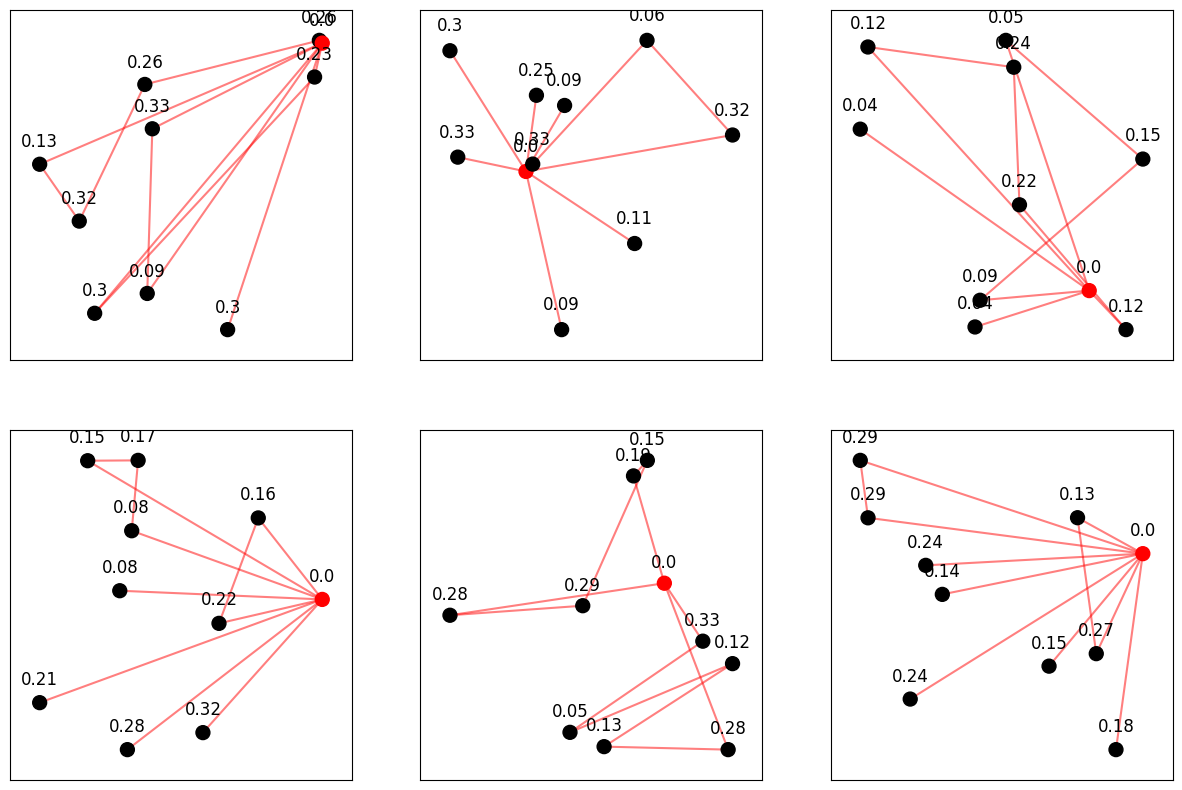

In [7]:
# Evaluate the agent
loss_a = agent_santa_irp.evaluate(env_santa_irp)

In [8]:
# Close the video recorder
env_santa_irp.vid.close()

Moviepy - Building video ./videos/video_test_santa_irp_10_23.mp4.
Moviepy - Writing video ./videos/video_test_santa_irp_10_23.mp4



Moviepy - Done !
Moviepy - video ready ./videos/video_test_santa_irp_10_23.mp4
